# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [20]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [21]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [22]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [23]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

# 1. What test is appropriate for this problem? Does CLT apply?

Here we are comparing two means to see if they are equal, hence we would use the two-sample test. 

# 2. What are the null and alternate hypotheses?

Null hypothesis: Mean proportion white callbacks - Mean proportion black callbacks = 0

Alternate Hypothesis: Mean proportion white callbacks - Mean proportion black callbacks > 0

Alpha = 0.05

# 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

To begin, let's separate the data into the "white" names and "black" names. 

In [44]:
w = data[data.race=='w']
b = data[data.race=='b']

Because we are more interested in the ratio of callbacks, as opposed to just the mean, I've defined a function that returns the proportion of values in a dataset that are equal to 1. 

In [11]:
# Define a function that returns the proportion of call-backs in a set of data
def proportion_calc(data):
    return np.sum(data) / len(data)

We see that the callback percentage for the "white" group is around 9.65%, while the callback percentage for the "black" group is around 6.45%.

In [47]:
w_callback_rate = proportion_calc(w['call'])
print(w_callback_rate)

0.09650924024640657


In [48]:
b_callback_rate = proportion_calc(b['call'])
print(b_callback_rate)

0.06447638603696099


In [51]:
# The difference in the callback rates in the sample data
diff_rate = w_callback_rate - b_callback_rate
print(diff_rate)

0.032032854209445585


Now let's gather the standard deviations of our sample data:

In [52]:
print(np.std(w['call']), np.std(b['call']))

0.29528486728668213 0.24559901654720306


In [12]:
proportion_calc(b['call'])

0.06447638603696099

margin of error =  $t$critical $X$ $Standard Error$

Standard Error = √ ( (variancew / nw) + (varianceb / nb ]

The Degrees of Freedom for this is 4711

Based on the very high degrees of freedom, the t-value for the 95% confidence level is 1.960.

In [56]:
# Calculate the Standard Error
SE = np.sqrt(np.var(w['call'])/len(w['call']) + np.var(b['call'])/len(b['call']))
print(SE)

0.007783308165446165


In [57]:
# Calculate the Margin of Error
MOE = 1.960 * SE
print(MOE)

0.015255284004274483


This margin of error gives us 95% confidence that the difference in callback rates between Whites and Blacks lies in the following interval: 

In [58]:
max_int = diff_rate + MOE
min_int = diff_rate - MOE
print(min_int, max_int)

0.0167775702051711 0.04728813821372007


A callback rate difference of zero lies 4.11 Standard Errors from the mean. The p-value of attaining a result like that is less than .0002. Therefore, we can reject the null hypothesis. 

In [59]:
diff_rate/SE

4.115583441968131

Now, let's attempt the same analysis using bootstrap techniques. 

In [13]:
# This function takes a set of data and a function
# It applies that function to a bootstrap sample of the data
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [14]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

0.007751465734372214
p-value =  2e-05


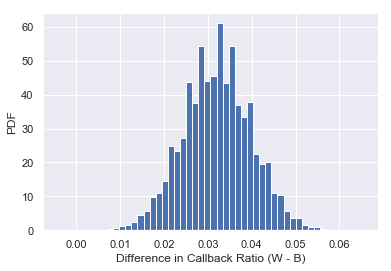

In [60]:
# Take 100,000 bootstrap replicates of the callback rate for both whites and blacks
w_bs_replicates = draw_bs_reps(w['call'], proportion_calc, size=100000)
b_bs_replicates = draw_bs_reps(b['call'], proportion_calc, size=100000)

# Store the differences between the randomized rates
bs_replicates = w_bs_replicates - b_bs_replicates


# Compute and print the standard deviation of the bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel("Difference in Callback Ratio (W - B)")
_ = plt.ylabel("PDF")

# Show the plot
plt.show

# Compute the p-value
p = np.sum(bs_replicates <= 0) / len(bs_replicates)

# Print p-value
print("p-value = ", p)

We see that using the bootstrap method, we also obtain a very low p-value. Very few of the 100,000 bootstrap samples had a higher callback rate for Blacks than for Whites. Based on the low p-value, we should reject the null hypothesis. 

# 4. Write a story describing the statistical significance in the context or the original problem.

When examining the rates at which applicants with white-sounding names were called back by potential employers versus the rates at which applicants with black-sounding names were called back, we find that indeed white applicants were called back more frequently. Based on the sample data, we can say with 95% confidence that applicants with white-sounding names are called back at a rate of at least 1.7% up to about 4.7% higher than black applicants.

# 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

Although it does appear that applicants with white-sounding names are called back at a higher rate, we cannot say that race is the most important factor in callback success. Factors such as education, previous work experience, gender, occupation, as well as many others could be more highly-correlated with callback success rates. I would amend my analysis by comparing other traits besides race. If race is indeed found to correlate most strongly, then we could conclude that it is the most important factor. 